# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [52]:
# Dependencies

import gmaps
import numpy as np
import pandas as pd
import requests
import json
from scipy.stats import linregress
from scipy import stats
from matplotlib import pyplot as plt
# Google developer API key
#from config import g_key
# Access maps with unique API key
#gmaps.configure(api_key=g_key)
# weather API key
from api_keys import weather_api_key

## Generate Cities List

In [8]:
# Import API Key
#from config import weather_api_key

# Incorporated Citipy to Determine City Based on Latitude & Longitude
from citipy import citipy

# Range of Latitudes & Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [9]:
lat_lngs = []
cities = []

# Create a Set of Random lat & lng Combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify Nearest City for Each lat, lng Combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the City is Unique, Then Add it to a Cities List
    if city not in cities:
        cities.append(city)

# Print the City Count to Confirm Sufficient Count
len(cities)

588

Perform API Calls

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -45.24,
        "lat": 60.14
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 3.93,
        "feels_like": -0.57,
        "temp_min": 3.93,
        "temp_max": 3.93,
        "pressure": 1014,
        "humidity": 70,
        "sea_level": 1014,
        "grnd_level": 1014
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.38,
        "deg": 315
    },
    "clouds": {
        "all": 0
    },
    "dt": 1600028857,
    "sys": {
        "country": "GL",
        "sunrise": 1599985510,
        "sunset": 1600032514
    },
    "timezone": -7200,
    "id": 3421765,
    "name": "Nanortalik",
    "cod": 200
}


In [11]:
print(requests.get(query_url + city))

<Response [200]>


In [12]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
                
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Ţahţā
Processing Record 2 | Albany
Processing Record 3 | Hobart
Processing Record 4 | Rikitea
Processing Record 5 | Busselton
Processing Record 6 | Mataura
Processing Record 7 | Port Alfred
Processing Record 8 | Asău
Processing Record 9 | Boddam
Processing Record 10 | Lithakia
Processing Record 11 | Kieta
Processing Record 12 | Hermanus
Processing Record 13 | Bethel
City not found. Skipping...
City not found. Skipping...
Processing Record 14 | Fortuna
Processing Record 15 | Papara
Processing Record 16 | Nyuksenitsa
Processing Record 17 | Boa Vista
Processing Record 18 | Hithadhoo
City not found. Skipping...
Processing Record 19 | Srednekolymsk
Processing Record 20 | Punta Arenas
Processing Record 21 | Yozgat Province
Processing Record 22 | Plettenberg Bay
City not found. Skipping...
Processing Record 23 | Tateyama
Processing Record 24 | Vestmanna
Processing Record 25 | Moranbah
Processing Record 26 | Provide

Processing Record 230 | Siderno
Processing Record 231 | Pandan
Processing Record 232 | Say
Processing Record 233 | Shingū
City not found. Skipping...
Processing Record 234 | Palauig
Processing Record 235 | Mildura
Processing Record 236 | Geraldton
Processing Record 237 | Lewistown
Processing Record 238 | Sabha
Processing Record 239 | Bonavista
Processing Record 240 | Price
Processing Record 241 | Alta Floresta
Processing Record 242 | Emba
Processing Record 243 | Parrita
Processing Record 244 | Gamboula
Processing Record 245 | Barrow
Processing Record 246 | Douentza
Processing Record 247 | Hualmay
Processing Record 248 | Aklavik
Processing Record 249 | Ambikāpur
Processing Record 250 | Quatre Cocos
Processing Record 251 | Porangatu
Processing Record 252 | Salalah
Processing Record 253 | Fowa
Processing Record 254 | Dongsheng
Processing Record 255 | College Place
Processing Record 256 | Porto Santo
Processing Record 257 | Saint-Joseph
Processing Record 258 | Tosya
Processing Record 259 |

Processing Record 464 | Tigil'
Processing Record 465 | Maraã
Processing Record 466 | Kununurra
Processing Record 467 | Contrecoeur
City not found. Skipping...
Processing Record 468 | Ransang
Processing Record 469 | Olinda
Processing Record 470 | Havre-St-Pierre
Processing Record 471 | Kemin
Processing Record 472 | Preobrazheniye
Processing Record 473 | Hvolsvollur
Processing Record 474 | Porto Belo
Processing Record 475 | Marquette
Processing Record 476 | Hebi
Processing Record 477 | Lucapa
Processing Record 478 | Haifa
Processing Record 479 | San Rafael
Processing Record 480 | Terrace Bay
Processing Record 481 | Kiama
Processing Record 482 | Codrington
Processing Record 483 | Karratha
Processing Record 484 | Selkirk
Processing Record 485 | Nishihara
Processing Record 486 | Faya
Processing Record 487 | Raudeberg
Processing Record 488 | Bac Lieu
Processing Record 489 | Las Margaritas
Processing Record 490 | Guangyuan
Processing Record 491 | Nioro
Processing Record 492 | Porto Velho
City

Convert Raw data to data frame

In [13]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City               546
Country            546
Date               546
Latitude           546
Longitude          546
Max Temperature    546
Humidity           546
Cloudiness         546
Wind Speed         546
dtype: int64

In [14]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Ţahţā,EG,1600029003,26.77,31.50,31.00,27,0,1.00
1,Albany,US,1600029004,42.60,-73.97,23.33,67,65,2.94
2,Hobart,AU,1600028750,-42.88,147.33,8.00,61,20,8.20
3,Rikitea,PF,1600029004,-23.12,-134.97,23.10,84,0,6.09
4,Busselton,AU,1600029004,-33.65,115.33,13.33,63,100,3.02


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
weather_df.describe()

,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,5.460000e+02,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,1.600029e+09,21.242875,14.259579,19.430568,70.402930,49.450549,3.397930
std,8.855427e+01,33.046907,89.719873,8.439882,21.954806,38.236328,2.178089
min,1.600029e+09,-54.800000,-179.170000,-5.180000,1.000000,0.000000,0.080000
25%,1.600029e+09,-5.580000,-62.930000,12.800000,58.000000,6.000000,1.790000
50%,1.600029e+09,26.905000,18.215000,21.025000,76.000000,48.000000,2.990000
75%,1.600029e+09,49.620000,89.765000,26.000000,87.000000,90.000000,4.600000
max,1.600029e+09,78.220000,179.320000,41.140000,100.000000,100.000000,12.900000


In [15]:
# Export & Save Data Into a .csv.
weather_df.to_csv("./Data/weather_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

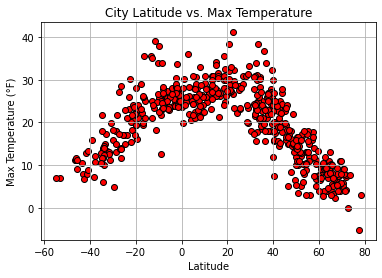

In [21]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

## Latitude vs. Humidity Plot

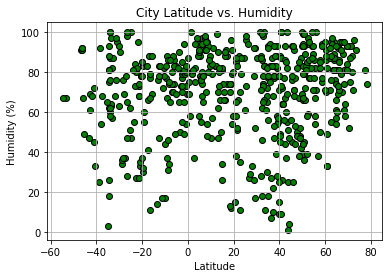

In [22]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], facecolors="green", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

## Latitude vs. Cloudiness Plot

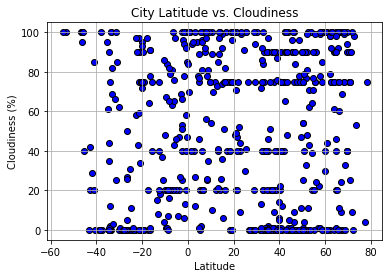

In [24]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

## Latitude vs. Wind Speed Plot

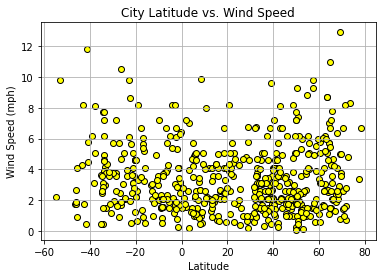

In [25]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

## Linear Regression

In [29]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
northern_df = weather_df.loc[weather_df["Latitude"] > 0]
northern_df.shape

(383, 9)

In [30]:
northern_df.head(3)

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Ţahţā,EG,1600029003,26.77,31.50,31.00,27,0,1.00
1,Albany,US,1600029004,42.60,-73.97,23.33,67,65,2.94
7,Asău,RO,1600029006,46.43,26.40,15.00,91,4,2.14


In [35]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
southern_df = weather_df.loc[weather_df["Latitude"] < 0]
southern_df.shape

(163, 9)

In [37]:
southern_df.head(3)

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
2,Hobart,AU,1600028750,-42.88,147.33,8.00,61,20,8.20
3,Rikitea,PF,1600029004,-23.12,-134.97,23.10,84,0,6.09
4,Busselton,AU,1600029004,-33.65,115.33,13.33,63,100,3.02


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.36x +33.25
The r-squared is: 0.6716872026851916


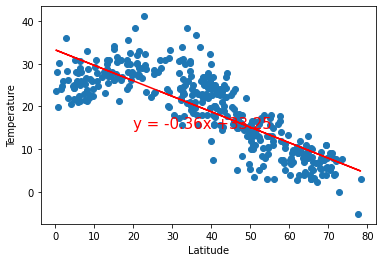

In [41]:
# Generate a scatter plot of year temperature vs Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Max Temperature']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save Figure
plt.savefig("./Data/Northern_Hemisphere_Latitude_vs_Temperature.png")

# Show plot
plt.show()



In [ ]:
In the Northern Hemisphere, temperature decreases as the Latitude increases. High temperature near the equator.
r-square of 0.67 shows high correlation between temperature and latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.43x +29.18
The r-squared is: 0.6518707309256865


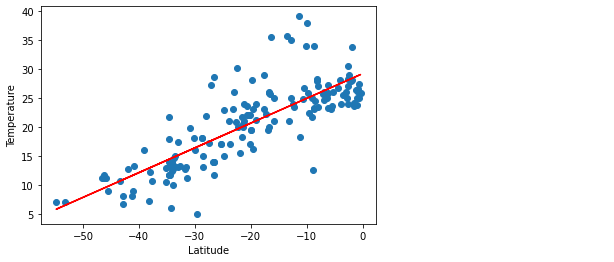

In [42]:
# Generate a scatter plot of year temperature vs Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Max Temperature']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")
# Save Figure
plt.savefig("./Data/Southern_Hemisphere_Latitude_vs_Temperature.png")

# Show plot
plt.show()

In [ ]:
In the Southern Hemosphere, temperature decreases as the Latitide increases. High temperature near he equator.
r-square of 0.65 shows high correlation between temperature and latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.07x +68.98
The r-squared is: 0.0038889187687887266


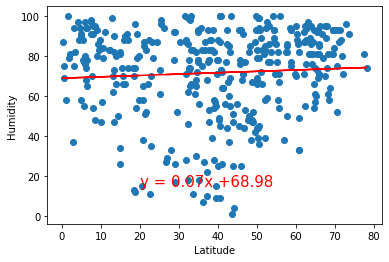

In [43]:
# Generate a scatter plot of year temperature vs Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save Figure
plt.savefig("./Data/Northern_Hemisphere_Latitude_vs_Humidity.png")

# Show plot
plt.show()

In [ ]:
Latitude has no effect on Humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.07x +68.95
The r-squared is: 0.00211762282861066


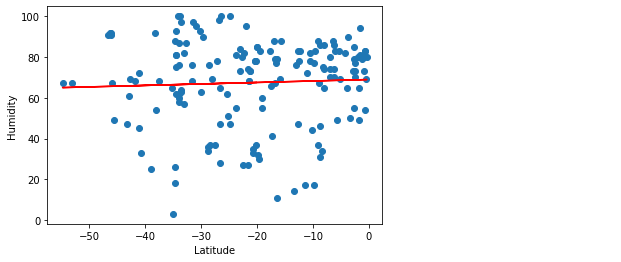

In [44]:
# Generate a scatter plot of year temperature vs Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save Figure
plt.savefig("./Data/Southern_Hemisphere_Latitude_vs_Humidity.png")

# Show plot
plt.show()

In [ ]:
Latitude has no effect on Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.09x +55.5
The r-squared is: 0.0021055383249680695


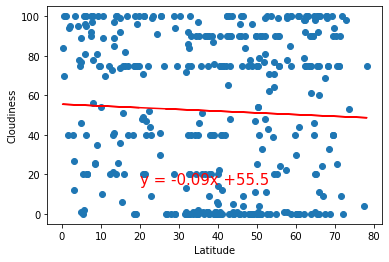

In [45]:
# Generate a scatter plot of year temperature vs Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save Figure
plt.savefig("./Data/Northern_Hemisphere_Latitude_vs_Cloudiness.png")

# Show plot
plt.show()



In [ ]:
Northern Hemisphere - Regression Line and plot shows Cloudiness is little less at Latitudes further away from the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.18x +46.95
The r-squared is: 0.004108590526852933


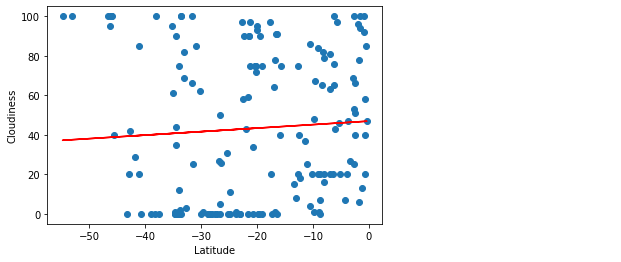

In [46]:
# Generate a scatter plot of year temperature vs Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save Figure
plt.savefig("./Data/Southern_Hemisphere_Latitude_vs_Cloudiness.png")

# Show plot
plt.show()



In [ ]:
Southern Hemisphere - Regression Line and plot shows Cloudiness is little less at Latitudes further away from the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.02x +2.65
The r-squared is: 0.02382337364504815


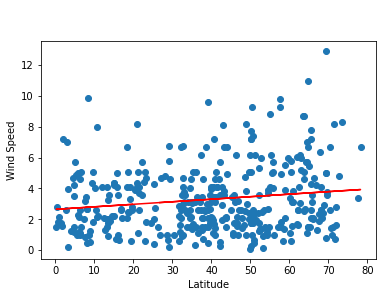

In [47]:
# Generate a scatter plot of year temperature vs Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save Figure
plt.savefig("./Data/Northern_Hemisphere_Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()



In [ ]:
Northern Hemisphere - Regression Line and plot shows wind speeds are slightly higher at Latitudes further away from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.02x +3.29
The r-squared is: 0.01099672400172806


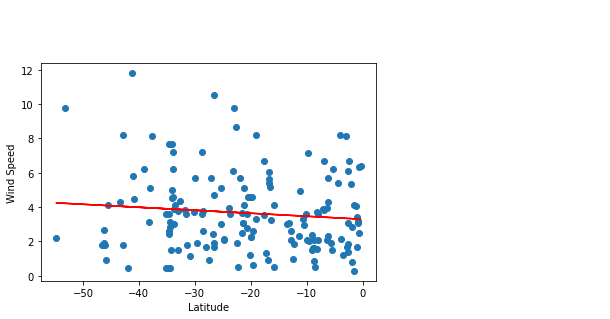

In [48]:
# Generate a scatter plot of year temperature vs Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save Figure
plt.savefig("./Data/Southern_Hemisphere_Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()



In [ ]:
Southern Hemisphere - Regression Line and plot shows wind speeds are slightly higher at Latitudes further away from the equator.